In [37]:
import pandas as pd
import cleanup
import numpy as np
import modules

# prevailing_wage_amount_9089

In [38]:
col_list = ["pw_amount_9089"]
visas_df = pd.read_csv('../data/us_perm_visas.csv', usecols=col_list)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (91) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
visas_df.dtypes

pw_amount_9089    object
dtype: object

Die Spalte `pw_amount_9089` wird von Pandas nicht automatisch als float erkannt.
Die Begründung ist, dass in manchen Zahlenwerten Trennzeichen in Form eines Kommas enthalten sind.

In [40]:
visas_df[visas_df["pw_amount_9089"].str.contains(pat = ',', na=False)]


,pw_amount_9089
135269,"83,366.00"
135270,"16,973.00"
135271,"49,982.00"
135272,"43,514.00"
135273,"16,973.00"
...,...
374357,"28,330.00"
374358,"107,744.00"
374359,"79,082.00"
374360,"37,981.00"


Diese Trennzeichen müssen entfernt werden, um eine Umwandlung in einen float Wert durchzuführen.
Dafür gibt es die Funktion `clean_currency` in der cleanup.py.

In [41]:
visas_df["pw_amount_9089"] = visas_df['pw_amount_9089'].apply(cleanup.clean_currency).astype('float')

In [42]:
visas_df.dtypes

pw_amount_9089    float64
dtype: object

Die Bereinigung war erfolgreich und ist in der cleanup.py unter der Funktion `clean_pw_amount_9089` aufgenommen worden.

# prevailing_wage_unit_of_pay_9089

In [43]:
col_list = ["pw_unit_of_pay_9089"]
visas_df = pd.read_csv('../data/us_perm_visas.csv', usecols=col_list)


In [44]:
visas_df["pw_unit_of_pay_9089"].value_counts()

Year         344323
yr            19757
Hour           7619
hr              726
Week            186
Month           123
Bi-Weekly        23
wk               21
mth               7
bi                5
Name: pw_unit_of_pay_9089, dtype: int64

Die Zahlungseinheiten der Spalte `pw_unit_of_pay_9089` sind uneinheitlich.
Teilweise wurde eine Langform und teilweise eine Kurzform gewählt.

Im Nachgang sollen die Einträge einheitlich auf eine Kurzform abgeändert werden.
Dafür gibt es die Funktion `normalize_pay_unit_columns` innerhalb der cleanup.py.

In [45]:
visas_df["pw_unit_of_pay_9089"] = cleanup.normalize_pay_unit_columns(visas_df["pw_unit_of_pay_9089"])

In [46]:
visas_df["pw_unit_of_pay_9089"].value_counts()

yr     364080
hr       8345
wk        207
mth       130
bi         28
Name: pw_unit_of_pay_9089, dtype: int64

Die Bereinigung war erfolgreich und wurde in der cleanup.py innerhalb der Funktion `clean_pw_unit_of_pay_9089` festgehalten.

# prevailing_wage_job_title_9089

In [47]:
col_list= ["pw_job_title_9089", "pw_job_title_908", "add_these_pw_job_title_9089"]
visas_df = pd.read_csv('../data/us_perm_visas.csv', usecols=col_list)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Aufgrund der Spaltenbezeichnungen wird angeommen, dass die vorliegenden Splaten zusammengeführt werden könnten.
Dies soll nun überprüft werden.

## Zusammenführung der Spalten

add_these_pw_job_title_9089
42194/374362 11%
Filled: |█████---------------------------------------------| 11.3% Rows

pw_job_title_908
150379/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows

pw_job_title_9089
223591/374362 60%
Filled: |█████████████████████████████---------------------| 59.7% Rows



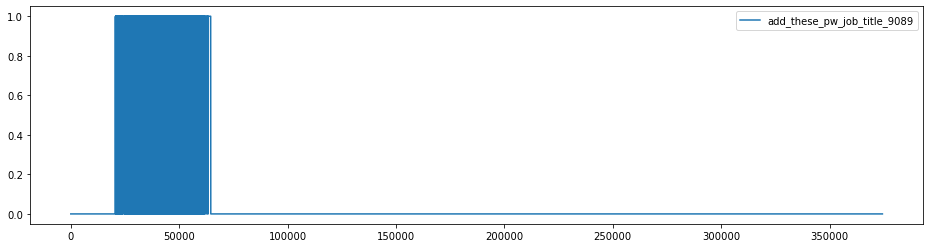

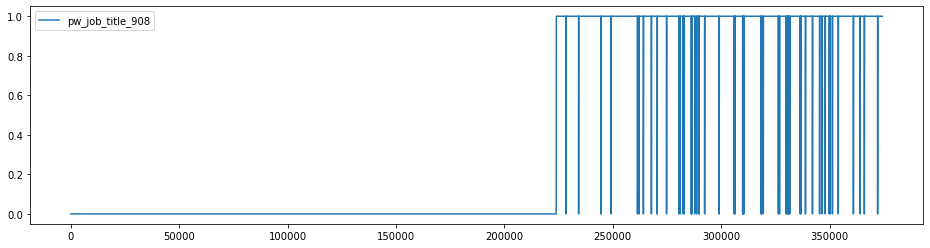

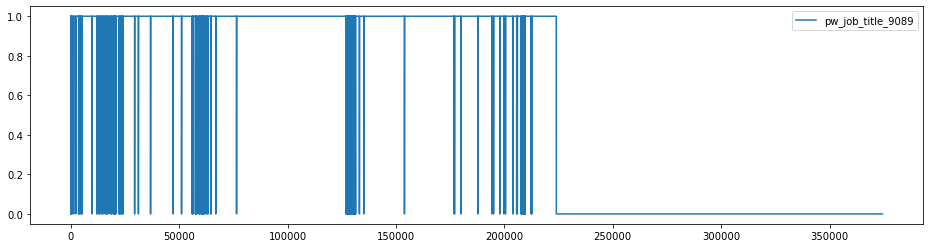

In [48]:
modules.print_count_of_values_relation(visas_df, True, True)

Die Spalten `pw_job_title_908` und `pw_job_title_908` können überschneidungsfrei zusammengeführt werden.
Die Spalte `add_these_pw_job_title_9089` kann genutzt werden um vorliegende Lücken zu füllen.

Es werden noch die Inhalte überprüft.

In [49]:
visas_df["pw_job_title_9089"].value_counts()

Software Developers, Applications                      60002
Computer Systems Analysts                              20125
Software Developers, Systems Software                  11057
Electronics Engineers, Except Computer                  8296
Computer and Information Systems Managers               5307
                                                       ...  
Mathematical Science Teachers, Postsedondary               1
Bookeeping and ccounting Clerk                             1
horse trainer                                              1
Baker/Donut Finisher                                       1
Compensation, Benefits and Job Analysis Specialists        1
Name: pw_job_title_9089, Length: 8307, dtype: int64

In [50]:
visas_df["pw_job_title_908"].value_counts()

Software Developers, Applications                           42092
Computer Systems Analysts                                    9631
Software Developers, Systems Software                        9007
Electronics Engineers, Except Computer                       4016
Computer and Information Systems Managers                    3016
                                                            ...  
OBIEE/Application Developer                                     1
Senior Production Stimulation Engineer                          1
Swim Instructor                                                 1
Manager, Regulatory Affairs Commercial Support                  1
Software Engineer II - Cloud and Enterprise Eng or Other        1
Name: pw_job_title_908, Length: 8874, dtype: int64

In [51]:
visas_df["add_these_pw_job_title_9089"].value_counts()


Software Developers, Applications                                          10042
Computer Systems Analysts                                                   3040
Software Developers, Systems Software                                       1930
Electronics Engineers, Except Computer                                      1493
Computer Systems Analyst                                                     909
                                                                           ...  
Landscaping Groundskeeping Workers                                             1
JANITORS AND CLEANERS                                                          1
Asst. Professor of Hospitality and Tourism Management                          1
FIRST-LINE SUPERVISORS/MANAGERS OF FOOD PREPARATION AND SERVING WORKERS        1
Computer Systems Test Analyst                                                  1
Name: add_these_pw_job_title_9089, Length: 4276, dtype: int64

Die Top Werte bei den Spalten `pw_job_title_9089`, `pw_job_title_908` und `add_these_pw_job_title_9089` stimmen weitestgehend überein.
Die Spalten gehören anscheinend zusammen.

Es werden `pw_job_title_908` und `pw_job_title_9089` zusammengeführt.
Anschließend wird der Blick auf `add_these_pw_job_title_9089` gerichtet.

In [52]:
visas_df['pw_job_title_merged'] = cleanup.mergeTwoColumns(visas_df, "pw_job_title_9089", "pw_job_title_908")

Spalten waren nicht überlappend und wurden fehlerfrei zusammengeführt.


C:\Users\andre\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


pw_job_title_merged
373970/374362 100%
Filled: |█████████████████████████████████████████████████-| 99.9% Rows

add_these_pw_job_title_9089
42194/374362 11%
Filled: |█████---------------------------------------------| 11.3% Rows



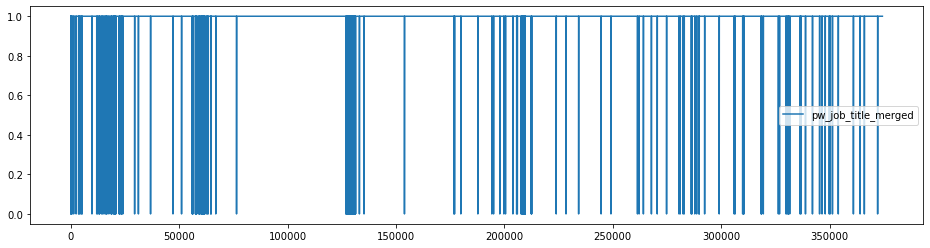

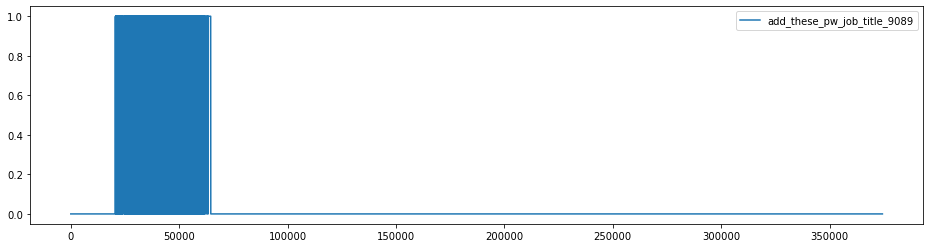

In [53]:
modules.print_count_of_values_relation(visas_df[["pw_job_title_merged", "add_these_pw_job_title_9089"]], True, True)

Alleine der Merge-Vorgang führt dazu, dass 99,9% aller Zeilen nun Werte enthalten. Es ist fraglich ob die Zusammenführung mit add_these_pw_job_title_9089 überhaupt noch notwendig ist.
Interessehalber schauen wir nach, wie die Werte im Vergleich mit den bestehenden Werten aussehen.

In [54]:
modules.areTwoColumnsOverlapping(visas_df, "pw_job_title_merged", "add_these_pw_job_title_9089")

C:\Users\andre\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


True

Die beiden Spalten überlappen teilweise. Wir geben nur überlappende Spalten aus:

In [55]:
visas_df[["pw_job_title_merged", "add_these_pw_job_title_9089"]][(visas_df["pw_job_title_merged"].isna() + visas_df["add_these_pw_job_title_9089"].isna()) == False].sample(20)


,pw_job_title_merged,add_these_pw_job_title_9089
32214,"Software Developers, Applications","Software Developers, Applications"
43351,"Software Developers, Applications","Software Developers, Applications"
40130,Computer Systems Analysts,Computer Systems Analysts
49983,Computer Systems Analysts,Computer Systems Analysts
33060,Industrial Engineers,Industrial Engineers
31380,Curators,Curators
30206,Computer Systems Analysts,Computer Systems Analysts
59304,"Special Education Teachers, Preschool, Kinderg...","TEACHER, SPECIAL EDUCATION"
41838,Chemists,Chemist
50613,Computer Systems Analysts,Computer Systems Analysts


In [56]:
(~(visas_df["pw_job_title_merged"].isna() + visas_df["add_these_pw_job_title_9089"].isna())).sum()

C:\Users\andre\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


42149

Es liegen 42.194 überlappende Werte vor.
Die Werte unterscheiden sich oft nur geringfügig.


Wir versuchen nur NaN Werte mit den Werten von add_these_pw_job_title_9089 zu füllen.

In [57]:
tempdf = pd.DataFrame
tempdf = visas_df[['pw_job_title_merged','add_these_pw_job_title_9089']]

tempdf[tempdf['pw_job_title_merged'].isna() & tempdf['add_these_pw_job_title_9089'].notna()]

,pw_job_title_merged,add_these_pw_job_title_9089
22351,NaN,MAINTENANCE TECHNICIAN
22455,NaN,"SOFTWARE DEVELOPERS, APPLICATIONS"
23120,NaN,"SOFTWARE DEVELOPERS, APPLICATIONS"
23251,NaN,COMPUTER SYSTEMS ANALYSTS
23602,NaN,MARKET RESEARCH ANALYST AND MARKETING SPECIALISTS
24015,NaN,"INFORMATION SECURITY ANALIST, WEB DEVELOPERS"
29442,NaN,MARKET RESEARCH ANALYST
31189,NaN,DENTAL LABORATORY TECHNICIAN
36794,NaN,COMPUTER PROGRAMMERS
57628,NaN,NETWORK AND COMPUTER SYSTEM ADMINISTRATORS


In [58]:
len(tempdf[tempdf['pw_job_title_merged'].isna() & tempdf['add_these_pw_job_title_9089'].notna()])

45

In 45 Fällen können die Jobtitel von `add_these_pw_job_title_9089` genutzt werden, um vorliegende Leerwerte zu befüllen.
Auch wenn die Anzahl der Fälle gering ist, werden wir diese der Vollständigkeit halber übernehmen.

In [59]:
visas_df['pw_job_title_merged'] = cleanup.mergeTwoColumns(visas_df, "pw_job_title_merged", "add_these_pw_job_title_9089")

C:\Users\andre\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


Achtung: Es liegen überlappende Spalten vor. Die erste Spalte wurde bei fehlenden Werte mit Inhalten der zweiten Spalte befüllt.


pw_job_title_merged
374015/374362 100%
Filled: |█████████████████████████████████████████████████-| 99.9% Rows



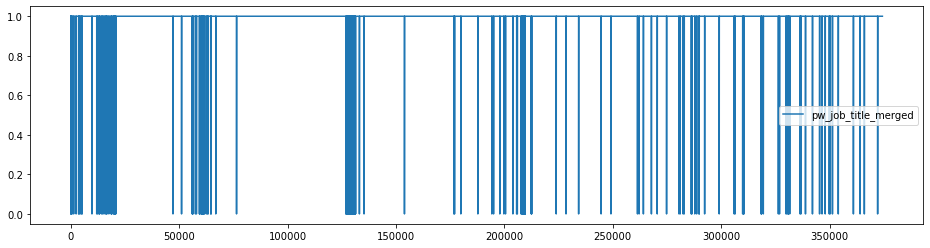

In [60]:
modules.print_count_of_values_relation(visas_df[["pw_job_title_merged"]], True, True)


## Bereinigen der vorhandenen Werte

Anzahl der einzigartigen Werte:

In [61]:
visas_df['pw_job_title_merged'].nunique()

14262

Anzahl der einzigartigen Werte, nachdem alle Werte auf lowercase abgeändert wurden.

In [62]:
visas_df['pw_job_title_merged'].str.lower().nunique()

12368

In [63]:
visas_df['pw_job_title_merged'].nunique()-visas_df['pw_job_title_merged'].str.lower().nunique()

1894

Durch die generelle Anwendung der Kleinschreibweise können 1.894 einzigartige Werte vermieden werden.
Dieser Schritt wird nun angewendet.

In [64]:
visas_df['pw_job_title_merged'] = visas_df['pw_job_title_merged'].str.lower()

Als nächstes sollen typische Leerwerte zu NaN Werten umgewandelt werden.

In [65]:
visas_df['pw_job_title_merged'] = cleanup.replaceNoneOrEmptyByNa(visas_df['pw_job_title_merged'])

In [66]:
visas_df['pw_job_title_merged'].nunique()

12368

Es lagen keine falschdeklarierten Leerwerte vor.

Als nächstes sollen unübliche Satzzeichen am Stringende, wie ein Komma, entfernt werden.

In [67]:
visas_df["pw_job_title_merged"] = cleanup.cutOffUnusualCharacters(visas_df["pw_job_title_merged"])


In [68]:
visas_df['pw_job_title_merged'].nunique()

12316

In [69]:
modules.print_full(visas_df['pw_job_title_merged'].value_counts()[:30])

software developers, applications                     105125
computer systems analysts                              30070
software developers, systems software                  20234
electronics engineers, except computer                 12350
computer and information systems managers               8456
network and computer systems administrators             5687
computer systems analyst                                5323
accountants and auditors                                5233
computer software engineers, applications               4891
mechanical engineers                                    4523
marketing managers                                      3923
management analysts                                     3731
financial analysts                                      3642
database administrators                                 3613
internists, general                                     3608
electrical engineers                                    3412
statisticians           

Singular- und Pluralschreibweise liegen im Datensatz im Wechsel vor.
Die Schreibweise soll im Nachgang vereinheitlicht werden, indem, falls vorhanden, das "s" am Stringende entfernt wird.

In [70]:
visas_df["pw_job_title_merged"] = visas_df["pw_job_title_merged"].apply(cleanup.cutOfflastCharacter, stringToCutOff="s")

In [ ]:
visas_df['pw_job_title_merged'].nunique()

In [72]:
modules.print_full(visas_df['pw_job_title_merged'].value_counts()[:100])

software developers, application                                                 105316
computer systems analyst                                                          35393
software developers, systems software                                             20235
electronics engineers, except computer                                            12450
computer and information systems manager                                           8907
network and computer systems administrator                                         5879
accountants and auditor                                                            5238
mechanical engineer                                                                5058
computer software engineers, application                                           4902
marketing manager                                                                  4192
management analyst                                                                 4120
database administrator          